In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

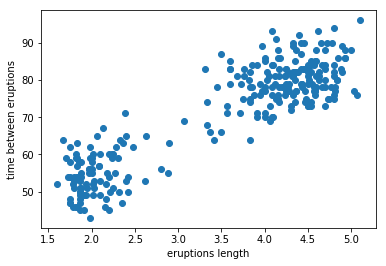

In [45]:
f=np.loadtxt("/Users/Yanean/Desktop/ML/HW3/faithful.dat.txt",usecols = (1,2))
plt.scatter(f[:,0],f[:,1])
plt.xlabel('eruptions length')
plt.ylabel('time between eruptions')

In [46]:
class ExpectationMaximization:
    
    def __init__(self, f, k=2):
        self.k = k
        self.f = f
        (N,M) = self.f.shape
        self.meansTra = []
        self.ini_mu = np.mat(np.zeros((k,M)))
        self.max_iteration = 100
        for i in range(M):
            min_data = min(f[:,i])
            max_data = max(f[:,i])
            self.ini_mu[:,i] =(max_data-min_data)*np.random.rand(k,1)
        self.ini_mu = np.array(self.ini_mu)
        self.pi = [0.5,0.5]
        cov = np.dot(f.T,f)/N
        self.ini_cov = np.array([cov]*k)
        
    
    def iteration(self):
        iteration = 0
        (N,M) = self.f.shape
        gama_i = np.zeros((N,self.k))
        for a in range (self.max_iteration):
            self.meansTra.append(np.copy(self.ini_mu))
            iteration+=1
            pre_gama_i = np.copy(gama_i)
            
    #def Estep(self):         
            for i in range(N):
                denominator = 0
                for j in range (self.k):
                    pi_yi = multivariate_normal.pdf(f[i,:],mean=self.ini_mu[j,:],cov=self.ini_cov[j])
                    denominator += self.pi[j]*pi_yi
                for j in range(self.k):
                    pi_yi = multivariate_normal.pdf(f[i,:],mean=self.ini_mu[j,:],cov=self.ini_cov[j])
                    gama_i[i,j]=self.pi[j]*pi_yi/denominator
    #def Mstep(self):
            if np.allclose(gama_i,pre_gama_i): break
            for j in range(self.k):
                numerator_mu = 0
                denominator_mu=0
                numerator_cov = 0
                denominator_cov=0
                #denominator_mu=np.sum([gama_i[:,j]])
                #numerator_mu = np.sum()
                for i in range(N):
                    denominator_mu = gama_i[i,j]+denominator_mu
                    numerator_mu = gama_i[i,j]*f[i,:]+numerator_mu
                self.ini_mu[j] = numerator_mu/denominator_mu
                for i in range(N):
                    denominator_cov = gama_i[i,j]+denominator_cov
                    numerator_cov = gama_i[i,j]*(f[i,:]-self.ini_mu[j])**2+numerator_cov
                self.ini_cov[j] = numerator_cov/denominator_cov
                self.pi[j] = (np.sum(gama_i[:,j]))/N
        return iteration
    
    
    def plot_tracjectory(self):
        plt.scatter(f[:,0],f[:,1],s=[50]*len(f),linewidth = 0,c='gray')
        Traj_mu1 = np.array([a[0,:] for a in self.meansTra])
        Traj_mu2 = np.array([b[1,:] for b in self.meansTra])
        prev_mu1x,prev_mu1y = None,None
        prev_mu2x,prev_mu2y = None,None
        for a in Traj_mu1:
            cur_mu1x = a[0]
            cur_mu1y = a[1]
            if prev_mu1x and prev_mu1y:
                plt.quiver(prev_mu1x,prev_mu1y,cur_mu1x-prev_mu1x,cur_mu1y-prev_mu1y,scale_units='xy', angles='xy', 
scale=1, color='g')
            prev_mu1x = cur_mu1x
            prev_mu1y = cur_mu1y
        for b in Traj_mu2:
            cur_mu2x = b[0]
            cur_mu2y = b[1]
            if prev_mu2x and prev_mu2y:
                plt.quiver(prev_mu2x,prev_mu2y,cur_mu2x-prev_mu2x,cur_mu2y-prev_mu2y,scale_units='xy', angles='xy', 
scale=1, color='r') 
            prev_mu2x,prev_mu2y = cur_mu2x,cur_mu2y
    def first_guess_from_kmeans(self,mu1,mu2,cov1,cov2):
        self.ini_mu = np.vstack((mu1,mu2))
        self.ini_cov = np.array([cov1,cov2])
        
        

This takes 17 iterative times to converge
This is the trajectories of the two mean vector in two dimensions
17


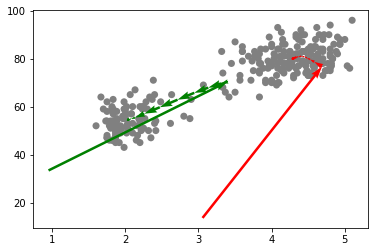

In [47]:
EM = ExpectationMaximization(f)
iteration = EM.iteration()
print("This takes "+str(iteration)+" iterative times to converge")
print("This is the trajectories of the two mean vector in two dimensions")
EM.plot_tracjectory()
print(iteration)

(array([  3.,   2.,   8.,   9.,   7.,  13.,   2.,   5.,   0.,   1.]),
 array([  9. ,  10.2,  11.4,  12.6,  13.8,  15. ,  16.2,  17.4,  18.6,
         19.8,  21. ]),
 <a list of 10 Patch objects>)

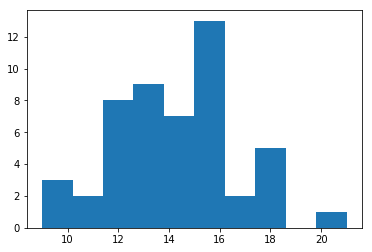

In [48]:
iterations = []
for i in range(50):
    EM = ExpectationMaximization(f)
    iteration = EM.iteration()
    iterations.append(iteration)
plt.hist(iterations)

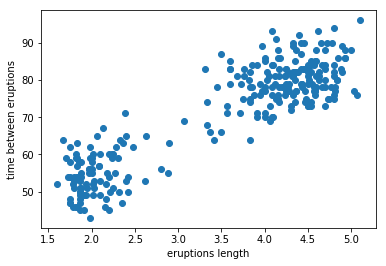

In [26]:
%matplotlib inline
#from tqdm import*
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
f=np.loadtxt("/Users/Yanean/Desktop/ML/HW3/faithful.dat.txt",usecols = (1,2))
plt.scatter(f[:,0],f[:,1])
plt.xlabel('eruptions length')
plt.ylabel('time between eruptions')

In [27]:
kmeans = KMeans(n_clusters = 2).fit(f,2)
cluster_label = kmeans.labels_

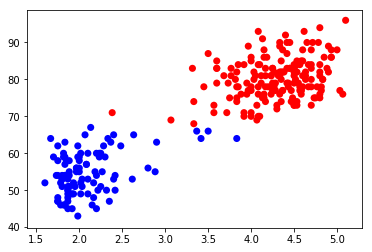

In [28]:
p1,p2 =[],[]
for i,j in zip(cluster_label,f):
    if cluster_label[i]==0:p1.append(j) 
    else: p2.append(j)
p1=np.array(p1)
p2=np.array(p2)
plt.figure()
plt.scatter(p1[:,0], p1[:,1], s=[50]*len(f), linewidth=0, c='r')
plt.scatter(p2[:,0], p2[:,1], s=[50]*len(f), linewidth=0, c='b')

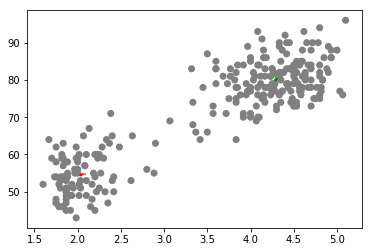

In [42]:
mu1 = np.mean(p1,axis=0)
mu2 = np.mean(p2,axis=0)
mu1,mu2
cov1 = np.dot((p1-mu1).T, p1-mu1)/p1.shape[0]
cov2 = np.dot((p2-mu2).T, p2-mu2)/p2.shape[0]
EM = ExpectationMaximization(f)
EM.first_guess_from_kmeans(m1,mu2,cov1,cov2)
iteration = EM.iteration()
print(iteration)
EM.plot_tracjectory()

(array([  0.,   0.,   0.,   0.,   0.,  50.,   0.,   0.,   0.,   0.]),
 array([ 7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5]),
 <a list of 10 Patch objects>)

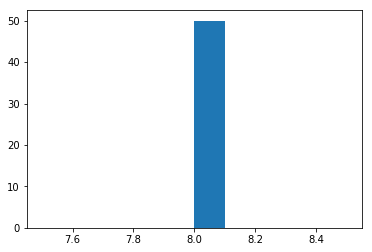

In [43]:
iterations = []
for i in range(50):
    kmeans = KMeans(n_clusters = 2).fit(f,2)
    cluster_label = kmeans.labels_
    p1,p2 =[],[]
    for i,j in zip(cluster_label,f):
        if cluster_label[i]==0:p1.append(j) 
        else: p2.append(j)
    p1=np.array(p1)
    p2=np.array(p2)
    mu1 = np.mean(p1,axis=0)
    mu2 = np.mean(p2,axis=0)
    mu1,mu2
    cov1 = np.dot((p1-mu1).T, p1-mu1)/p1.shape[0]
    cov2 = np.dot((p2-mu2).T, p2-mu2)/p2.shape[0]
    EM = ExpectationMaximization(f)
    EM.first_guess_from_kmeans(m1,mu2,cov1,cov2)
    iteration = EM.iteration()
    iterations.append(iteration)    
plt.hist(iterations)